# 4. Pandas

## 4.1 
#### Informações gerais do dataset 

In [1]:
# Importando a biblioteca 
import pandas as pd  

# Importando o dataset
df = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")

In [2]:
# Visualização do cabeçalho
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
# Colunas, tipo de dado de cada coluna e se há valor faltante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
# Transformação da coluna de datas de “Object” para “datetime64”
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [5]:
# Informações estatísticas sobre o banco de dados:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 11:59:59.999999744,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [6]:
# Quais colunas apresentam NaN:
df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
WHO Region        False
dtype: bool

## 4.2
#### 5 províncias da China com maior número de casos confirmados 

In [7]:
# Copiando o dataframe
df_china = df.copy()

# Filtrando apenas dados da China
df_china = df_china.loc[df_china["Country/Region"] == "China", :]

# Casos confirmados em ordem crescente
df_china = df_china.sort_values("Confirmed", ascending=False)

# Removendo dos valores duplicados
df_china = df_china.drop_duplicates(subset=["Province/State"], keep="first")

# Dataframe das 5 províncias
df_top5 = df_china.head()
df_top5

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
44170,Hubei,China,30.9756,112.2707,2020-07-09,68135,4512,63623,0,Western Pacific
48867,Hong Kong,China,22.3000,114.2000,2020-07-27,2778,22,1486,1270,Western Pacific
48599,Guangdong,China,23.3417,113.4244,2020-07-26,1672,8,1645,19,Western Pacific
44168,Henan,China,37.8957,114.9042,2020-07-09,1276,22,0,1254,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


In [8]:
# Tomando informações das features "Confirmed", "Active", "Deaths", "Recovered"
df_top5_2= df_top5[["Confirmed", "Active", "Deaths", "Recovered"]]
df_top5_2

,Confirmed,Active,Deaths,Recovered
44170,68135,0,4512,63623
48867,2778,1270,22,1486
48599,1672,19,8,1645
44168,1276,1254,22,0
48887,1270,1,1,1268


In [9]:
# Agrupando o novo dataframe a partir dessas províncias
df_china2 = df_top5_2.groupby(df_top5["Province/State"]).sum()

# Dataframe com a 5 regiões com maior número de confirmados
df_china5 = df_china2.sort_values("Confirmed", ascending=False)
df_china5

,Confirmed,Active,Deaths,Recovered
Province/State,,,,
Hubei,68135,0,4512,63623
Hong Kong,2778,1270,22,1486
Guangdong,1672,19,8,1645
Henan,1276,1254,22,0
Zhejiang,1270,1,1,1268


## 4.3
#### Concatenando as colunas "Province/State" e "Country/Region". Posteriormente, removendo a coluna "Province/State" 

In [10]:
# Copiando o dataframe
df_3 = df.copy()

# Função que se a coluna “Province/State” não for valor faltante, concatena seu valor com a coluna “Country/Region”
concat = lambda x: f"{x['Country/Region']}_{x['Province/State']}" if pd.notna(x['Province/State']) else x['Country/Region']
df_3["Country/Region"] = df_3.apply(concat, axis=1)

# Excluindo a coluna "Province/State"
df_3 = df_3.drop(["Province/State"], axis=1)
df_3

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [11]:
# Visualizando apenas as informações alteradas
df_3[df_3["Country/Region"].str.contains("_")]

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australia_Australian Capital Territory,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,Australia_New South Wales,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Australia_Northern Territory,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Australia_Queensland,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,Australia_South Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...
49052,United Kingdom_Anguilla,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,United Kingdom_British Virgin Islands,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,United Kingdom_Turks and Caicos Islands,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,United Kingdom_Falkland Islands (Malvinas),-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


# 4.4
#### Ranking de maior número de mortes por milhão de habitantes entre os continentes

In [12]:
# Importando o dataset
import pandas as pd
df_4 = pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv")

In [13]:
# Cabeçalho do dataset
df_4.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [14]:
# Tomando informações das colunas 
df_4_2 = df_4[['Country/Region', 'Continent', 'Population']]
df_4_2

,Country/Region,Continent,Population
0,USA,North America,3.311981e+08
1,Brazil,South America,2.127107e+08
2,India,Asia,1.381345e+09
3,Russia,Europe,1.459409e+08
4,South Africa,Africa,5.938157e+07
...,...,...,...
204,Montserrat,North America,4.992000e+03
205,Caribbean Netherlands,North America,2.624700e+04
206,Falkland Islands,South America,3.489000e+03
207,Vatican City,Europe,8.010000e+02


In [15]:
# Agrupando o dataframe "covid_19_clean_complete" por países
df_grouped = df.groupby('Country/Region', as_index=False)['Deaths'].sum()
df_grouped

,Country/Region,Deaths
0,Afghanistan,49098
1,Albania,5708
2,Algeria,77972
3,Andorra,5423
4,Angola,1078
...,...,...
182,West Bank and Gaza,1370
183,Western Sahara,63
184,Yemen,17707
185,Zambia,2643


In [16]:
# Mesclando os dois dataframes
df_merged = df_4.merge(df_grouped, on='Country/Region', how='inner')

# Selecionando apenas as colunas "Continent", "Population" e "Deaths"
df_merged = df_merged[['Continent', 'Population', 'Deaths']]
df_merged

,Continent,Population,Deaths
0,South America,2.127107e+08,3938034
1,Asia,1.381345e+09,1111831
2,Europe,1.459409e+08,619385
3,Africa,5.938157e+07,181979
4,North America,1.290662e+08,1728277
...,...,...,...
166,Asia,7.285750e+06,0
167,North America,7.200400e+04,0
168,North America,5.323700e+04,0
169,North America,5.678000e+04,0


In [17]:
# Agrupando o dataframe mesclado pelo continente
df_m_g = df_merged.groupby("Continent", as_index=False).agg({"Population": "sum", "Deaths": "sum"})
df_m_g

,Continent,Population,Deaths
0,Africa,1.215738e+09,682067
1,Asia,3.020510e+09,3882965
2,Australia/Oceania,4.039107e+07,13570
3,Europe,6.794130e+08,14689301
4,North America,2.568683e+08,2666043
5,South America,4.308076e+08,5681838


In [18]:
# Criando nova coluna de mortes por milhão
df_m_g['Deaths/1M Pop'] = ((df_m_g['Deaths'] / df_m_g['Population']) * (10**6))
df_m_g

,Continent,Population,Deaths,Deaths/1M Pop
0,Africa,1.215738e+09,682067,561.031368
1,Asia,3.020510e+09,3882965,1285.533099
2,Australia/Oceania,4.039107e+07,13570,335.965367
3,Europe,6.794130e+08,14689301,21620.575480
4,North America,2.568683e+08,2666043,10379.026514
5,South America,4.308076e+08,5681838,13188.806632


In [19]:
# Ordenando de acordo com a coluna Deaths/1M Pop em ordem decrescente
df_m_g = df_m_g.sort_values("Deaths/1M Pop", ascending=False)
df_m_g.reset_index(drop=True, inplace=True)
df_m_g

,Continent,Population,Deaths,Deaths/1M Pop
0,Europe,6.794130e+08,14689301,21620.575480
1,South America,4.308076e+08,5681838,13188.806632
2,North America,2.568683e+08,2666043,10379.026514
3,Asia,3.020510e+09,3882965,1285.533099
4,Africa,1.215738e+09,682067,561.031368
5,Australia/Oceania,4.039107e+07,13570,335.965367


# 5. Visualização de dados

## 5.1 
#### Gráfico linechart mortes x tempo

In [20]:
# Importando as bibliotecas
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: title={'center': 'Deaths x Time'}, xlabel='Date', ylabel='Deaths'>

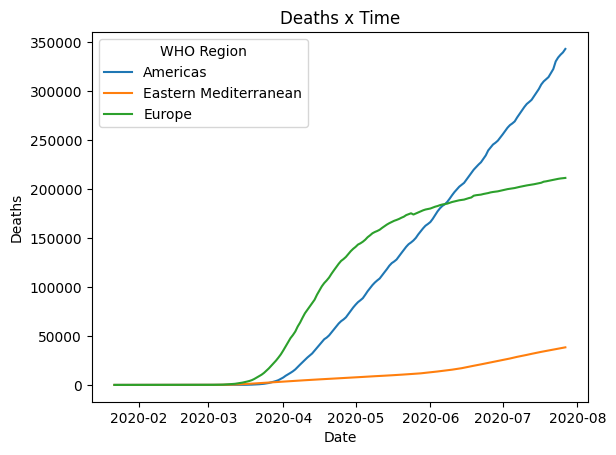

In [21]:
df_line = df[['WHO Region', 'Deaths', 'Date']]
df_line = df.loc[df['WHO Region'].isin(['Americas', 'Eastern Mediterranean', 'Europe'])]
df_line = df_line.groupby(['WHO Region', 'Date']).sum('Deaths')

plt.title('Deaths x Time')
sns.lineplot(data=df_line, x='Date', y='Deaths', hue='WHO Region')

É possível observar que as regiões das Américas e da Europa tiveram mais mortes. Cada progressão começa a subir a partir, aproximadamente, da metade do mês de Março de 2020. A taxa de crescimento de cada região é positiva, sendo a das Américas quase exponencial.

## 5.2 Bar Charts
#### Bar charts que compara a quantidade de mortes nos continentes

<Axes: title={'center': "Continent's Deaths"}, xlabel='Continent', ylabel='Deaths'>

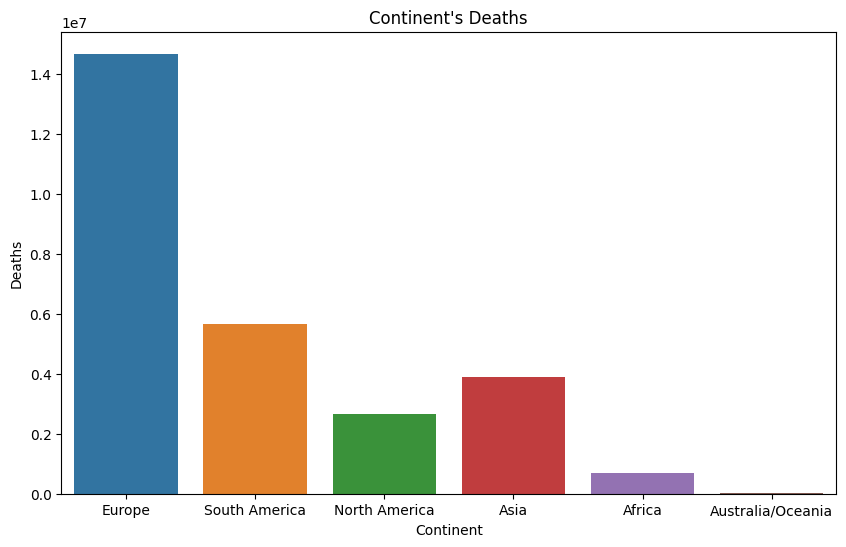

In [22]:
# Definindo as dimensões do gráfico
plt.figure(figsize=(10,6))

# Definindo o título do gráfico
plt.title("Continent's Deaths")

# Definindo as informações dos eixos x e y
sns.barplot(x=df_m_g["Continent"], y=df_m_g['Deaths'])

Os dois continentes que tiveram maior número de mortes foram a Europa e a América (América do Sul). Ao contrário, o continente com o menor número de mortes foi a Austrália/Oceania. Acredito que a Europa foi o continente com mais mortos devido a faixa etária média da população europeia ser elevada. E a América do Sul, por ter apenas países subdesenvolvidos.

## 5.3 Scatter Plots

In [23]:
# Agrupando o dataframe pela coluna "Continent"
df_top3 = df_4.groupby('Continent', as_index=False).sum()

# Ordenando pelos maiores valores da feature "Deaths/1M Pop"
df_top3.sort_values('Deaths/1M pop', ascending=False, inplace=True)

# Selecionando apenas a feature "Deaths/1M Pop" além da "Continent"
df_top3 = df_top3[:3][['Continent', 'Deaths/1M pop']]
df_top3

,Continent,Deaths/1M pop
3,Europe,9673.0
4,North America,3097.0
5,South America,2818.0


In [24]:
# Filtrando no dataframe original apenas os dados que contém os continentes acima
df_filtered = df_4[df_4['Continent'].isin(df_top3['Continent'])]
df_filtered

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
3,Russia,Europe,145940924.0,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,33016319.0,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Greenland,North America,56780.0,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


Text(0.5, 1.0, 'Deaths/1M pop x Population')

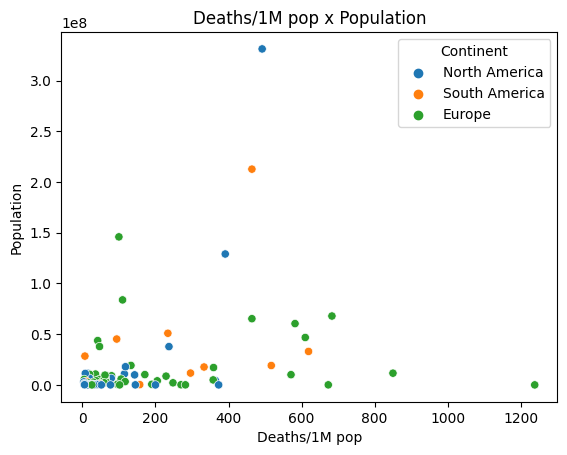

In [25]:
# Plotando o gráfico de dispersão do dataframe filtrado
sns.scatterplot(data=df_filtered, x='Deaths/1M pop', y='Population', hue='Continent')
plt.title("Deaths/1M pop x Population")

A maioria dos dados se concentra entre 0 a 200 mortes por milhão de habitantes.
Não há relação entre as features.

## 5.4 Heatmap de Correlação


In [26]:
# Visualizando o dataframe
df_4

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [27]:
# Verificando se as colunas são categóricas ou numéricas
df_4.dtypes

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object

In [28]:
# Selecionando as features relevantes (numéricas)
numerics = [ 'int64', 'float64']
df4_selected = df_4.select_dtypes(include=numerics)

# Eliminando as colunas com valores faltantes
df4_selected = df4_selected.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis=1)
df4_selected

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0
1,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0
2,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0
3,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0
4,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0
...,...,...,...,...,...,...,...,...,...,...
204,4.992000e+03,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0
205,2.624700e+04,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0
206,3.489000e+03,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0
207,8.010000e+02,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN


<Axes: >

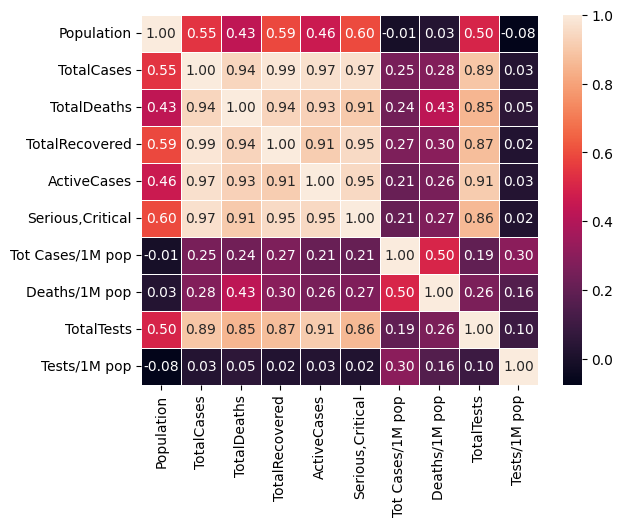

In [29]:
corr = df4_selected.corr()
sns.heatmap(corr, annot=True, fmt='.02f', linewidths=0.5)

A correlação entre Population e Tests/1M pop é de -0.08, ou seja, essas features possuem pouca relação entre si.